<a href="https://colab.research.google.com/github/Lovelyfin00/Lovelyfin00/blob/main/Omokaro_Loveth_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [1]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 22 kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split #For splitting
import lightgbm as lgb 
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Loading the datasets

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SampleSubmission.csv to SampleSubmission.csv
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
User uploaded file "SampleSubmission.csv" with length 8748 bytes
User uploaded file "Test.csv" with length 67526 bytes
User uploaded file "Train.csv" with length 160318 bytes


In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

In [5]:
train.head().T

,0,1,2,3,4
ID,ID_4A9AR6FQ,ID_X28T3VEK,ID_AWXARH57,ID_FQVZHE81,ID_QVLWGPRN
Year_of_Birth,1955,1958,1962,1979,1959
Education_Level,Graduation,Graduation,Graduation,2n Cycle,Graduation
Marital_Status,Divorced,Together,Single,Single,Married
Disposable_Income,77504.4,56784,103715,46311.6,87486
No_of_Kids_in_home,1,0,0,1,0
No_of_Teen_in_home,1,1,0,0,0
Date_Customer,22-06-2014,01-08-2013,21-11-2013,13-09-2013,21-01-2014
Recency,56,17,17,49,59
Discounted_Purchases,2,6,0,3,1


In [6]:
test.head().T

,0,1,2,3,4
ID,ID_ZPMABNVX,ID_WFE91NAA,ID_JV11RBRK,ID_6B7SVKY9,ID_GOVUZ545
Year_of_Birth,1954,1961,1973,1970,1959
Education_Level,Graduation,Graduation,Basic,Graduation,Graduation
Marital_Status,Single,Widow,Married,Together,Together
Disposable_Income,48556.8,57499.2,17025.6,91983.6,78235.2
No_of_Kids_in_home,0,0,0,0,0
No_of_Teen_in_home,1,1,0,0,2
Date_Customer,11-01-2013,22-11-2012,28-02-2013,16-08-2013,25-07-2013
Recency,85,79,47,98,41
Discounted_Purchases,6,5,1,1,2


In [7]:
train.shape

(1568, 27)

In [8]:
test.shape

(672, 26)

In [9]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [12]:
train['Education_Level'].value_counts()

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

In [13]:
test['Education_Level'].value_counts()

Graduation    325
PhD           146
Master        124
2n Cycle       61
Basic          16
Name: Education_Level, dtype: int64

In [14]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

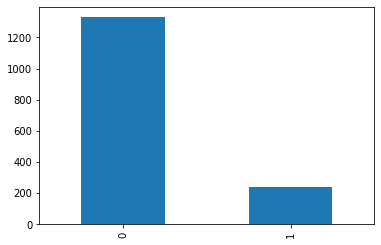

In [15]:
train.Response.value_counts().plot(kind='bar')
plt.show()

In [16]:
train['Marital_Status'].value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [17]:
test['Marital_Status'].value_counts()

Married     249
Together    171
Single      151
Divorced     73
Widow        27
Absurd        1
Name: Marital_Status, dtype: int64

In [18]:
#Convert Datetime
train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])

In [19]:
#Checking for missing values in train and test

train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [20]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [21]:
train['Disposable_Income']

0        77504.4
1        56784.0
2       103714.8
3        46311.6
4        87486.0
          ...   
1563     52893.6
1564     74190.0
1565     80857.2
1566     58701.6
1567     27873.6
Name: Disposable_Income, Length: 1568, dtype: float64

In [22]:
#Filling the missing values with mean on train

mean_train = round(train['Disposable_Income'].mean(), 1)

In [23]:
mean_train

62381.2

In [24]:
train['Disposable_Income'] = train['Disposable_Income'].fillna(mean_train)

In [25]:
train.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [26]:
#Filling the missing values with mean on test

mean_test = round(test['Disposable_Income'].mean(), 1)

In [27]:
mean_test

63434.2

In [28]:
test['Disposable_Income'] = test['Disposable_Income'].fillna(mean_test)

In [29]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

# Exploratory Data Analysis

In [30]:
train['Marital_Status'].value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [31]:
test['Marital_Status'].value_counts()

Married     249
Together    171
Single      151
Divorced     73
Widow        27
Absurd        1
Name: Marital_Status, dtype: int64

Plotting for our categorical datast

In [32]:
#We are calculating the percentage of each values

train.Marital_Status.value_counts(normalize=True)


Married     0.392219
Together    0.260842
Single      0.209821
Divorced    0.101403
Widow       0.031888
Alone       0.001913
YOLO        0.001276
Absurd      0.000638
Name: Marital_Status, dtype: float64

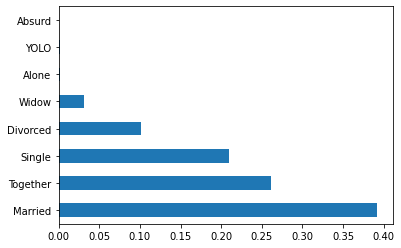

In [33]:

#ploting the barh of the percentage

train.Marital_Status.value_counts(normalize=True).plot.barh()
plt.show()




The Dataset contains more Married people



In [34]:
#We are calculating the percentage of each values

test.Marital_Status.value_counts(normalize=True)


Married     0.370536
Together    0.254464
Single      0.224702
Divorced    0.108631
Widow       0.040179
Absurd      0.001488
Name: Marital_Status, dtype: float64

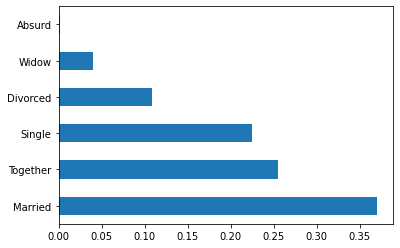

In [35]:
#ploting the barh of the percentage

test.Marital_Status.value_counts(normalize=True).plot.barh()
plt.show()



Education_Level



In [36]:
train.Education_Level.value_counts(normalize=True)


Graduation    0.511480
PhD           0.216837
Master        0.156888
2n Cycle      0.090561
Basic         0.024235
Name: Education_Level, dtype: float64

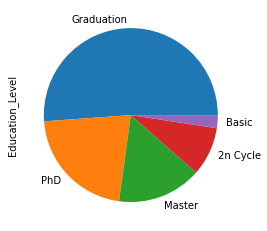

In [37]:
#ploting the barh of the percentage

train.Education_Level.value_counts(normalize=True).plot.pie()
plt.show()

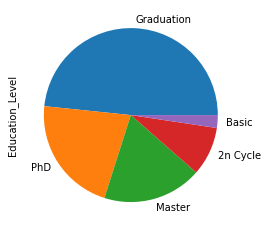

In [38]:
#ploting the barh of the percentage

test.Education_Level.value_counts(normalize=True).plot.pie()
plt.show()

In [39]:
train['Marital_Status'].value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [40]:
#Renaming the strings not in test to others

train.Marital_Status = train.Marital_Status.replace(('YOLO', 'Alone', 'Absurd'),'Others')

In [41]:
train['Marital_Status'].value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Others        6
Name: Marital_Status, dtype: int64

In [42]:
test['Marital_Status'].value_counts()

Married     249
Together    171
Single      151
Divorced     73
Widow        27
Absurd        1
Name: Marital_Status, dtype: int64

In [43]:
#For test

test.Marital_Status = test.Marital_Status.replace('Absurd','Others')

In [44]:
test.Marital_Status.value_counts()

Married     249
Together    171
Single      151
Divorced     73
Widow        27
Others        1
Name: Marital_Status, dtype: int64

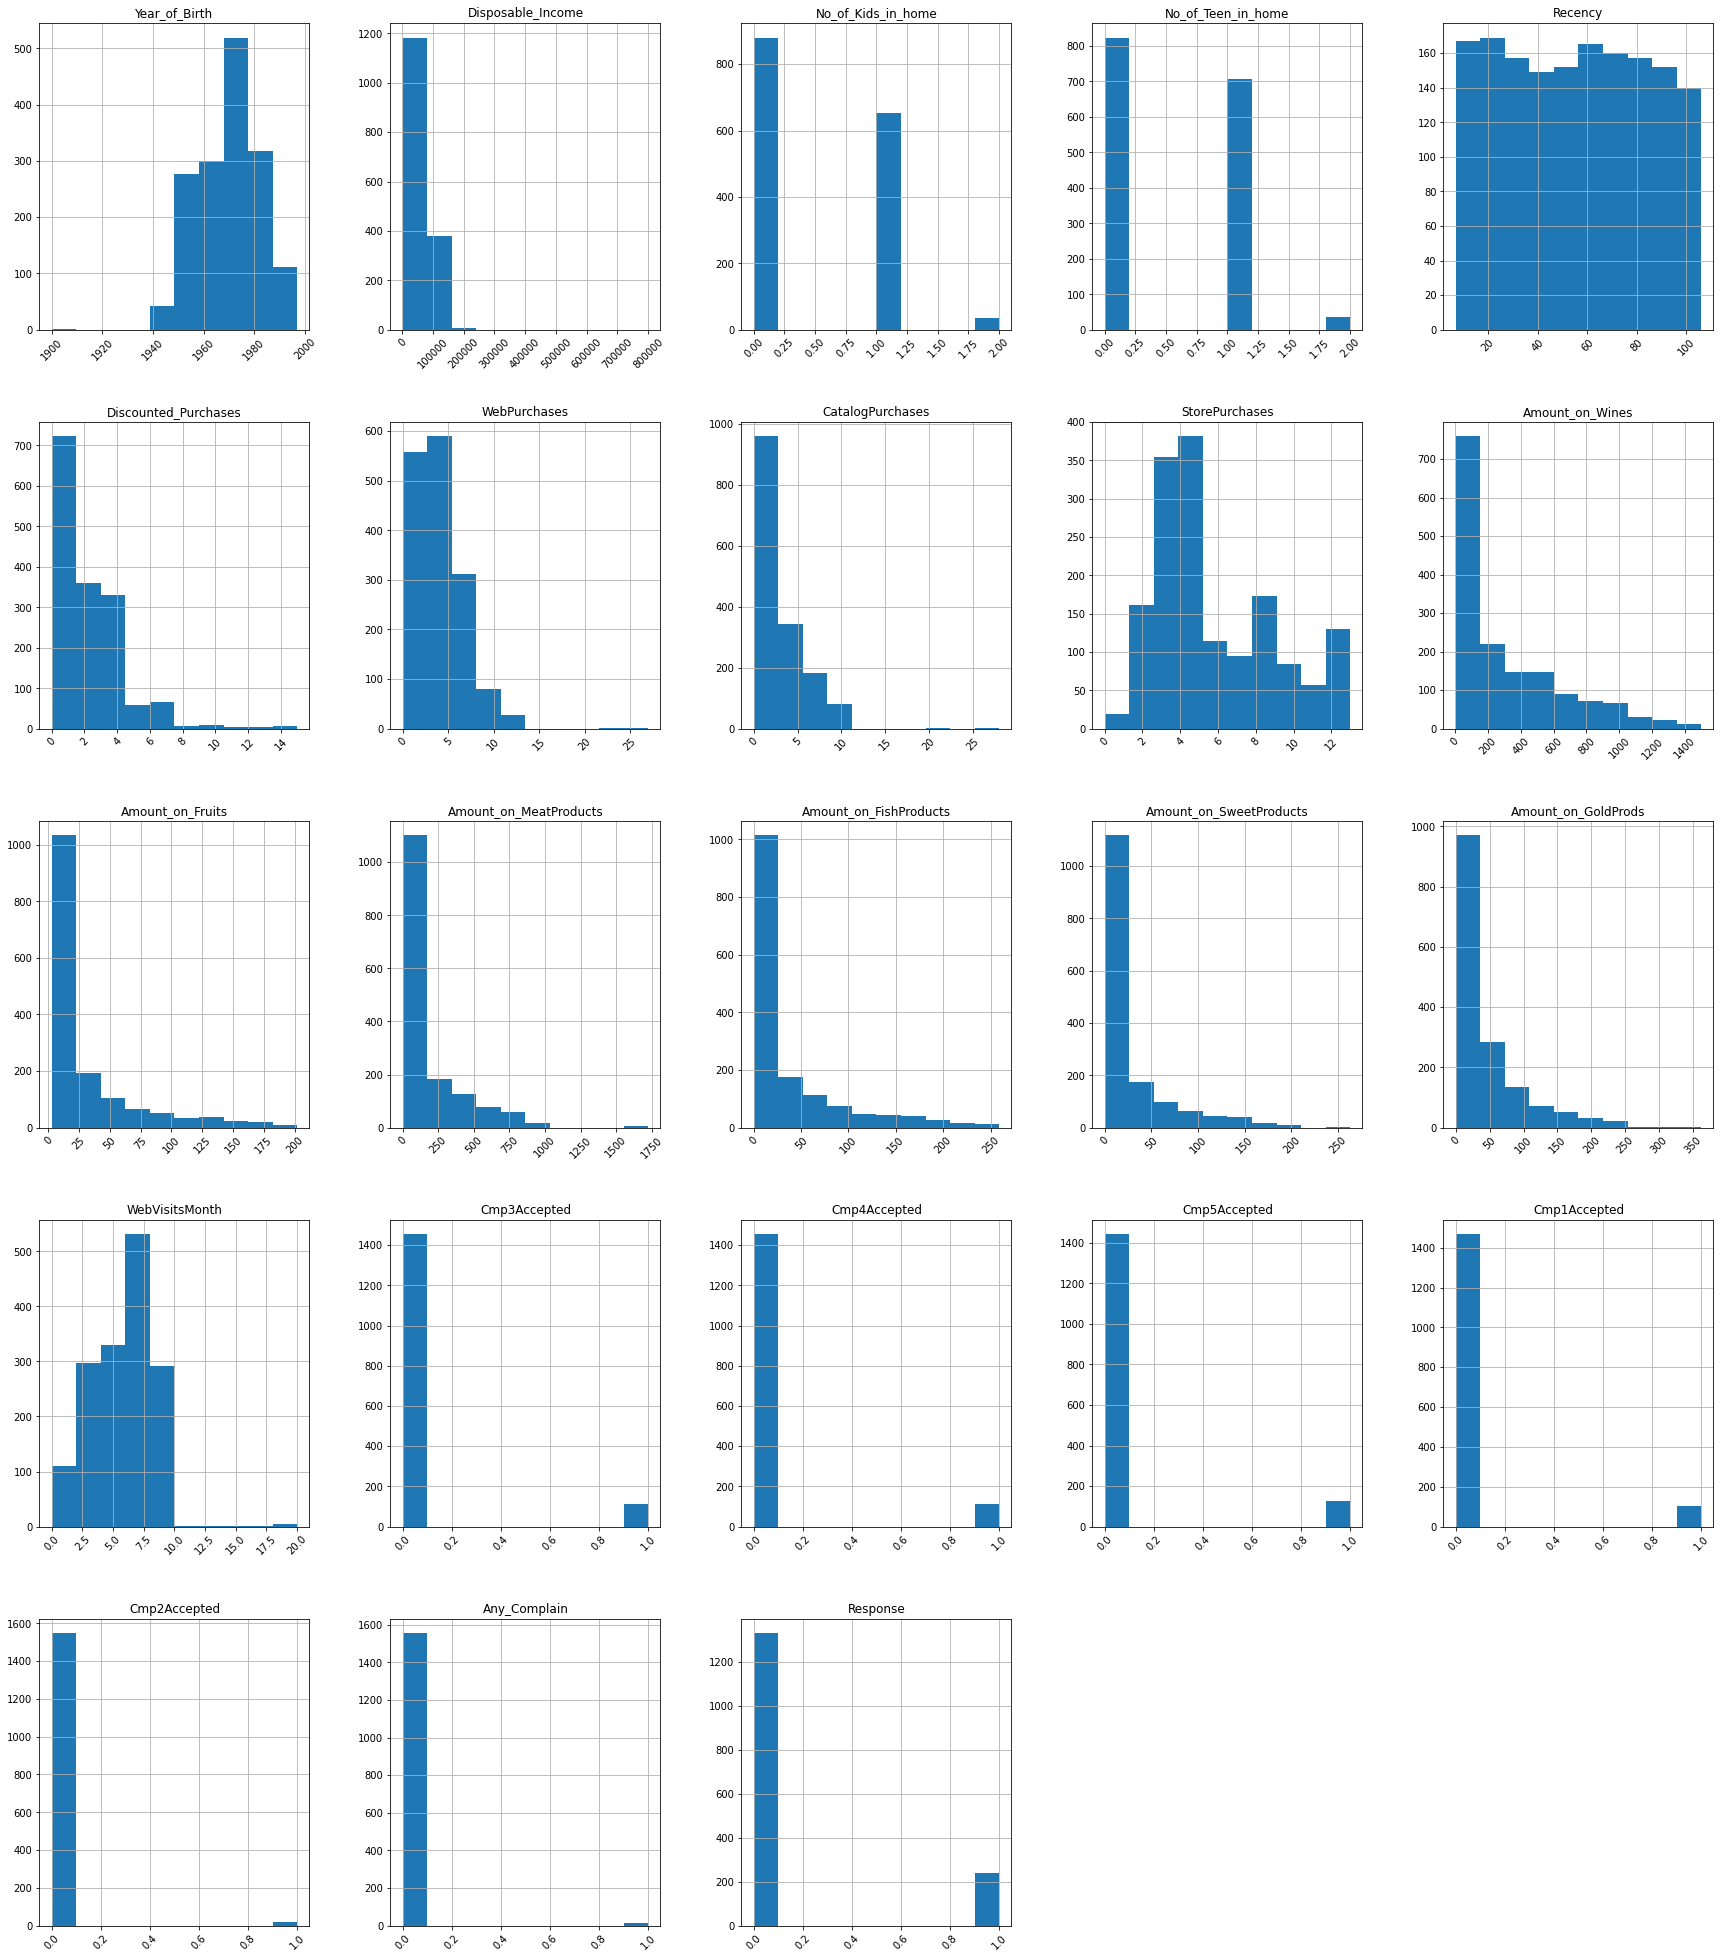

In [45]:
train.hist(figsize=(30,35), xrot=45)
plt.show()

In [46]:
train['Cmp3Accepted'].value_counts()

0    1454
1     114
Name: Cmp3Accepted, dtype: int64

In [47]:
train['Cmp4Accepted'].value_counts()

0    1454
1     114
Name: Cmp4Accepted, dtype: int64

In [48]:
train['Cmp5Accepted'].value_counts()

0    1442
1     126
Name: Cmp5Accepted, dtype: int64

In [49]:
train['Cmp1Accepted'].value_counts()

0    1467
1     101
Name: Cmp1Accepted, dtype: int64

In [50]:
#Viewing Categorical column

train.describe(include='object')

,ID,Education_Level,Marital_Status
count,1568,1568,1568
unique,1568,5,6
top,ID_KDWPBG1S,Graduation,Married
freq,1,802,615


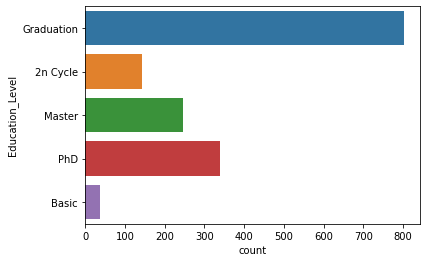

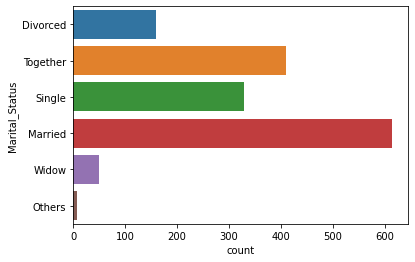

In [51]:
for col in train.select_dtypes(include='object'):
    if train[col].nunique() <= 22:
        sns.countplot(y=col, data=train)
        plt.show()

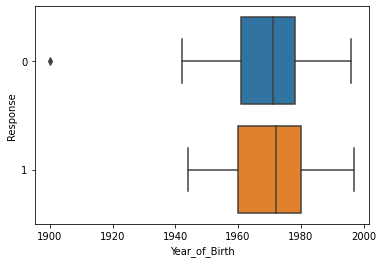

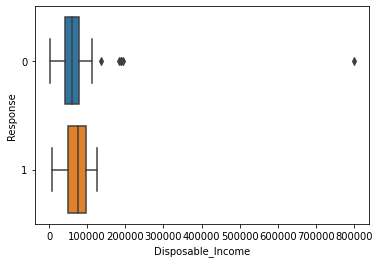

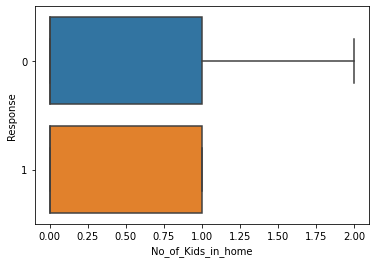

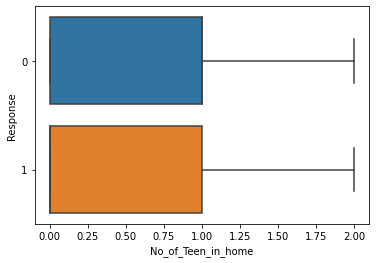

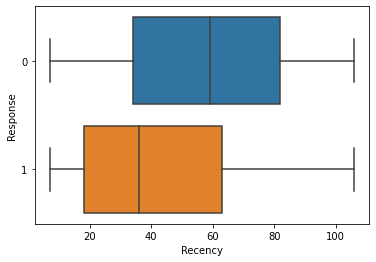

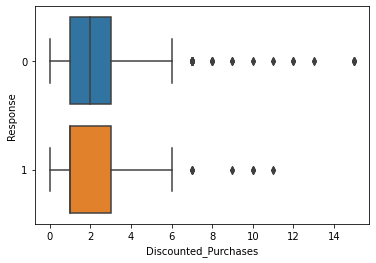

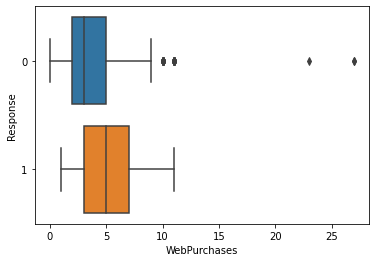

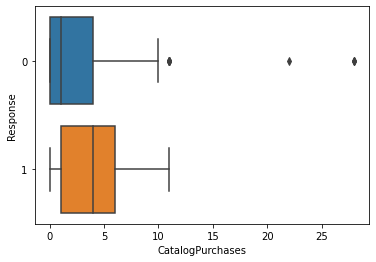

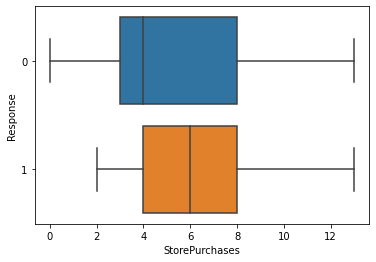

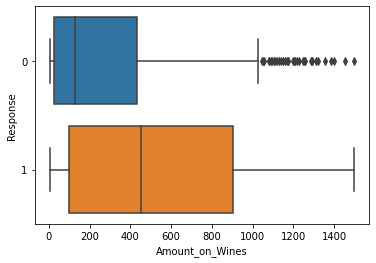

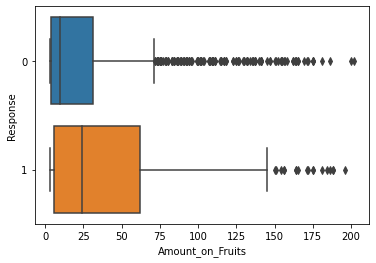

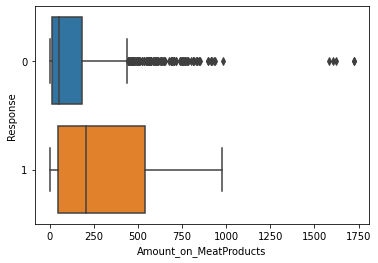

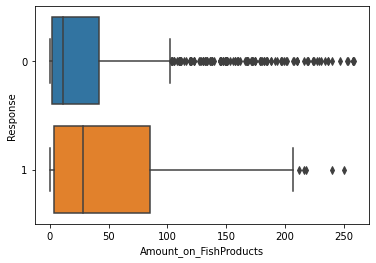

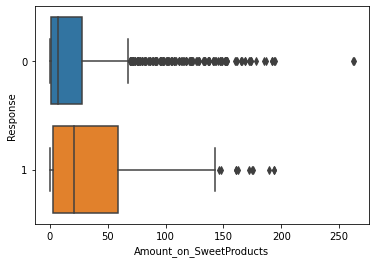

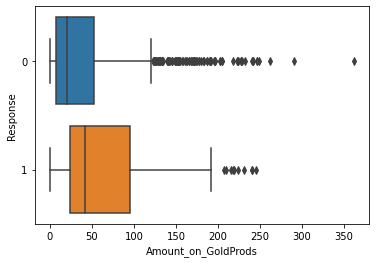

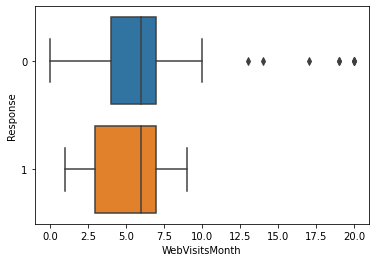

In [52]:
#Finding the relationship between the numeric features and our Target 

num_cols = ['Year_of_Birth','Disposable_Income','No_of_Kids_in_home',
           'No_of_Teen_in_home','Recency','Discounted_Purchases','WebPurchases',
            'CatalogPurchases','StorePurchases','Amount_on_Wines','Amount_on_Fruits','Amount_on_MeatProducts',
           'Amount_on_FishProducts','Amount_on_SweetProducts','Amount_on_GoldProds','WebVisitsMonth']
for col in num_cols:
    sns.boxplot(y = train['Response'].astype('category'), x = col, data=train)
    plt.show()

In [53]:
train['No_of_Kids_in_home'].value_counts()

0    880
1    654
2     34
Name: No_of_Kids_in_home, dtype: int64

In [54]:
#For categorical features

for col in train.select_dtypes(include='object'):
    if train[col].nunique() <=10:
        display(pd.crosstab(train['Response'], train[col], normalize='index'))
        

Education_Level,2n Cycle,Basic,Graduation,Master,PhD
Response,,,,,
0,0.096313,0.027840,0.516930,0.156509,0.202408
1,0.058577,0.004184,0.481172,0.158996,0.297071


Marital_Status,Divorced,Married,Others,Single,Together,Widow
Response,,,,,,
0,0.095561,0.404063,0.002257,0.194131,0.276900,0.027088
1,0.133891,0.326360,0.012552,0.297071,0.171548,0.058577


In [55]:
display(pd.crosstab(train['Response'], train[col]))

Marital_Status,Divorced,Married,Others,Single,Together,Widow
Response,,,,,,
0,127,537,3,258,368,36
1,32,78,3,71,41,14


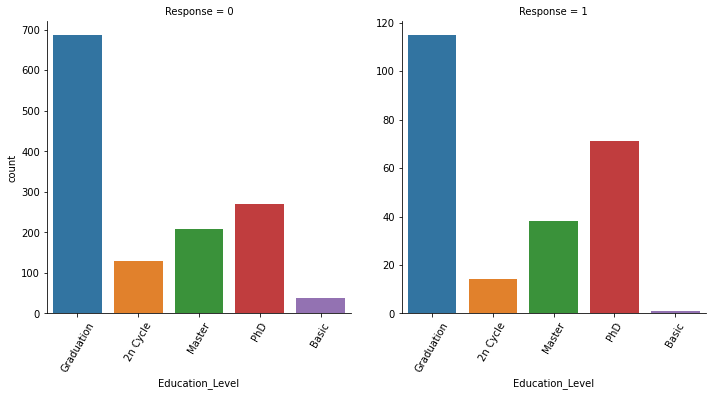

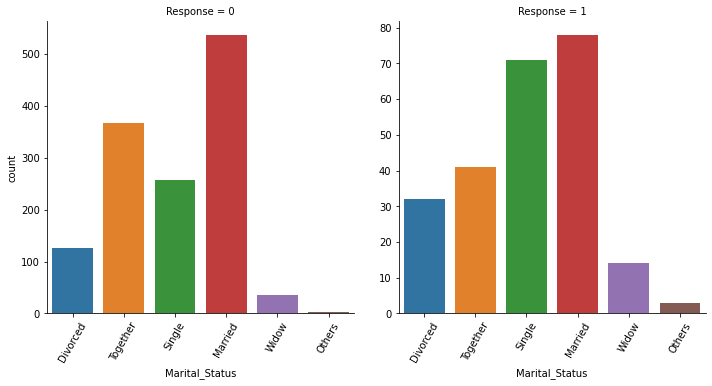

In [56]:
for col in train.select_dtypes(include='object'):
    if train[col].nunique() <= 10:
        g = sns.catplot(x = col, kind='count', col = 'Response', data=train, sharey=False)
        g.set_xticklabels(rotation=60)

In [57]:
#Label Encoding Education Level for train

le = LabelEncoder()

In [58]:
train['Education_Level'] = le.fit_transform(train['Education_Level'])
train['Education_Level'].value_counts()

2    802
4    340
3    246
0    142
1     38
Name: Education_Level, dtype: int64

In [59]:
#Label Encoding Education Level for test

test['Education_Level'] = le.fit_transform(test['Education_Level'])
test['Education_Level'].value_counts()

2    325
4    146
3    124
0     61
1     16
Name: Education_Level, dtype: int64

In [60]:
#One hot encoding Marital Status

ohe = OneHotEncoder(handle_unknown='ignore')

In [61]:


ohe_df = pd.DataFrame(ohe.fit_transform(train[['Marital_Status']]).toarray())

In [62]:
train = train.join(ohe_df)


In [63]:
#Dropping Marital_status

train = train.drop('Marital_Status', axis=1)

In [64]:
train.head().T

,0,1,2,3,4
ID,ID_4A9AR6FQ,ID_X28T3VEK,ID_AWXARH57,ID_FQVZHE81,ID_QVLWGPRN
Year_of_Birth,1955,1958,1962,1979,1959
Education_Level,2,2,2,0,2
Disposable_Income,77504.4,56784,103715,46311.6,87486
No_of_Kids_in_home,1,0,0,1,0
No_of_Teen_in_home,1,1,0,0,0
Date_Customer,2014-06-22 00:00:00,2013-01-08 00:00:00,2013-11-21 00:00:00,2013-09-13 00:00:00,2014-01-21 00:00:00
Recency,56,17,17,49,59
Discounted_Purchases,2,6,0,3,1
WebPurchases,1,5,7,4,3


In [65]:
#For test column

ohe_df = pd.DataFrame(ohe.transform(test[['Marital_Status']]).toarray())

In [66]:
test = test.join(ohe_df)

In [67]:
test = test.drop('Marital_Status', axis=1)

In [68]:
test.head().T

,0,1,2,3,4
ID,ID_ZPMABNVX,ID_WFE91NAA,ID_JV11RBRK,ID_6B7SVKY9,ID_GOVUZ545
Year_of_Birth,1954,1961,1973,1970,1959
Education_Level,2,2,1,2,2
Disposable_Income,48556.8,57499.2,17025.6,91983.6,78235.2
No_of_Kids_in_home,0,0,0,0,0
No_of_Teen_in_home,1,1,0,0,2
Date_Customer,2013-11-01 00:00:00,2012-11-22 00:00:00,2013-02-28 00:00:00,2013-08-16 00:00:00,2013-07-25 00:00:00
Recency,85,79,47,98,41
Discounted_Purchases,6,5,1,1,2
WebPurchases,8,7,2,4,7


In [69]:
train = train.drop(['ID'], axis=1)

In [70]:
test = test.drop(['ID'], axis=1)

#Feature Engineering

In [71]:
train['Total_Purchase'] = train['Discounted_Purchases'] + train['StorePurchases'] + train['WebPurchases'] + train['CatalogPurchases']

In [72]:
test['Total_Purchase'] = test['Discounted_Purchases'] + test['StorePurchases'] + test['WebPurchases'] + test['CatalogPurchases']

In [73]:
train ['Year_Regristration'] = pd.DatetimeIndex(train['Date_Customer']).year

In [74]:
test ['Year_Regristration'] = pd.DatetimeIndex(test['Date_Customer']).year

In [75]:
train ['Month_Regristration'] = pd.DatetimeIndex(train['Date_Customer']).month

In [76]:
test ['Month_Regristration'] = pd.DatetimeIndex(test['Date_Customer']).month

In [77]:
train = train.drop('Date_Customer', axis=1)

In [78]:
test = test.drop('Date_Customer', axis=1)

In [79]:
train['CmpAccepted'] = train['Cmp1Accepted'] + train['Cmp2Accepted'] + train['Cmp3Accepted'] + train['Cmp4Accepted'] + train['Cmp5Accepted']

In [80]:
test['CmpAccepted'] = test['Cmp1Accepted'] + test['Cmp2Accepted'] + test['Cmp3Accepted'] + test['Cmp4Accepted'] + test['Cmp5Accepted']

#Building our model

In [81]:
#Split into X and y
X = train.drop('Response', axis=1)
y = train.Response

In [83]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
#Creating model 
catboost_model=CatBoostClassifier(class_weights = [0.2, 0.8])

In [101]:
#Training Catboost Model on train set
catboost_model.fit(X_train,y_train)

Learning rate set to 0.011348
0:	learn: 0.6856470	total: 3.78ms	remaining: 3.77s
1:	learn: 0.6794311	total: 6.67ms	remaining: 3.33s
2:	learn: 0.6725762	total: 9.43ms	remaining: 3.13s
3:	learn: 0.6654608	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6564884	total: 15.3ms	remaining: 3.04s
5:	learn: 0.6512029	total: 18.1ms	remaining: 2.99s
6:	learn: 0.6448991	total: 20.8ms	remaining: 2.95s
7:	learn: 0.6387417	total: 23.7ms	remaining: 2.94s
8:	learn: 0.6329522	total: 26.4ms	remaining: 2.91s
9:	learn: 0.6280240	total: 30.5ms	remaining: 3.02s
10:	learn: 0.6219970	total: 33.2ms	remaining: 2.98s
11:	learn: 0.6170618	total: 36ms	remaining: 2.96s
12:	learn: 0.6106999	total: 38.8ms	remaining: 2.94s
13:	learn: 0.6054273	total: 41.6ms	remaining: 2.93s
14:	learn: 0.6006562	total: 44.3ms	remaining: 2.91s
15:	learn: 0.5961209	total: 47.1ms	remaining: 2.89s
16:	learn: 0.5909672	total: 49.8ms	remaining: 2.88s
17:	learn: 0.5865133	total: 52.7ms	remaining: 2.88s
18:	learn: 0.5821757	total: 55.4ms	remaining: 

In [102]:
#Predictiing on Test Set
y_pred_catboost=catboost_model.predict(X_test)

In [103]:
#Evaluating model using f1_score
print("Catboost F1 score on validation set is : ",f1_score(y_test,y_pred_catboost))

Catboost F1 score on validation set is :  0.6105263157894737


In [104]:
#Now Predict on Test set
catboost_preds = catboost_model.predict(test)

In [105]:
#checking our sample_submission file

sample_submission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [106]:
#we are making a copy of the submission file and then create our own from it
submission_file = sample_submission.copy()

In [107]:
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [108]:
#we are saving our testing prediction inside the submission file

submission_file.Response = catboost_preds

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


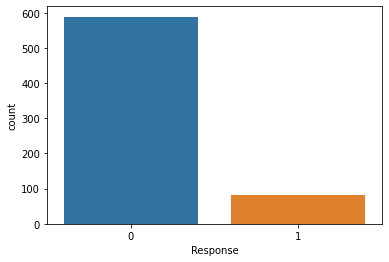

In [109]:
sns.countplot(submission_file.Response)
plt.show()

In [110]:
#creating our submission file

submission_file.to_csv('my6_submission.csv', index=False)

In [111]:
files.download('my6_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>